# 82_HAR USING PCA

In [26]:
# human activity reconi

In [27]:
import pandas as pd

url ='https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/features.txt'
feature_name_df = pd.read_csv(url, sep='\s+', header=None, names=['column_indx', 'column_name'])

feature_name = feature_name_df.iloc[:,1].values.tolist()

In [28]:
X_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/X_train.txt'
X_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/X_test.txt'

X_train = pd.read_csv(X_train_url, sep='\s+', header=None)
                                # sep : Delimiter(구분문자)) to use. If sep is None, the C engine cannot automatically detect the separator, but the Python parsing engine can, meaning the latter will be used and automatically detect the separator by Python's builtin sniffer tool, `csv.Sniffer`. 
                                # In addition, separators longer than 1 character and different from '\s+' will be interpreted as regular expressions and will also force the use of the Python parsing engine. 
                                # Note that regex delimiters are prone to ignoring quoted data. Regex example: ' '.
X_test = pd.read_csv(X_test_url, sep='\s+', header=None)

X_train.columns = feature_name
X_test.columns = feature_name

In [72]:
sep_test = pd.read_csv(X_train_url, sep='\s+', header=None)
sep_test

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [29]:
y_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/y_train.txt'
y_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/y_test.txt'

y_train = pd.read_csv(y_train_url, sep='\s+', header=None)
y_test = pd.read_csv(y_test_url, sep='\s+', header=None)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7352, 561), (2947, 561), (7352, 1), (2947, 1))

In [31]:
from sklearn.decomposition import PCA

def get_pca_data(ss_data, n_components=2):
    pca = PCA(n_components=n_components)
    pca.fit(ss_data)

    return pca.transform(ss_data), pca

In [32]:
%%time
HAR_pca, pca = get_pca_data(X_train, n_components=2)
HAR_pca.shape

CPU times: user 1.01 s, sys: 200 ms, total: 1.21 s
Wall time: 256 ms


(7352, 2)

In [33]:
pca.mean_.shape, pca.components_.shape

((561,), (2, 561))

In [34]:
cols = ['pca_' + str(n) for n in range(pca.components_.shape[0])]
cols

['pca_0', 'pca_1']

In [35]:
def get_pd_from_pca(pca_data, col_num):
    cols = ['pca_' + str(n) for n in range(pca.components_.shape[0])]
    return pd.DataFrame(pca_data, columns=cols)

In [36]:
%%time
HAR_pca, pca = get_pca_data(X_train, n_components=2)
HAR_pd_pca = get_pd_from_pca(HAR_pca, pca.components_.shape[0])
HAR_pd_pca['action'] = y_train
HAR_pd_pca.head()

CPU times: user 749 ms, sys: 109 ms, total: 858 ms
Wall time: 145 ms


,pca_0,pca_1,action
0,-5.520280,-0.290277,5
1,-5.535350,-0.082530,5
2,-5.474988,0.287387,5
3,-5.677232,0.897031,5
4,-5.748749,1.162952,5


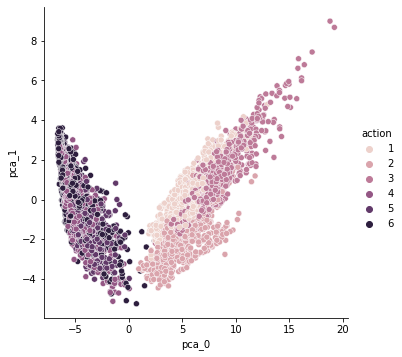

In [37]:
import seaborn as sns
sns.pairplot(HAR_pd_pca, hue='action', height=5, x_vars=['pca_0'], y_vars=['pca_1'])

In [40]:
import numpy as np

def print_variance_ratio(pca):
    print('variance ratio : ', pca.explained_variance_ratio_)
    print('sum of variance ratio : ', np.sum(pca.explained_variance_ratio_))

In [41]:
print_variance_ratio(pca)

variance ratio :  [0.6255444  0.04913023]
sum of variance ratio :  0.674674627048795


In [43]:
# n_components = 3

HAR_pca, pca = get_pca_data(X_train, n_components=3)
HAR_pd_pca = get_pd_from_pca(HAR_pca, pca.components_.shape[0])
HAR_pd_pca['action'] = y_train
HAR_pd_pca.head()

,pca_0,pca_1,pca_2,action
0,-5.520280,-0.290278,-1.529929,5
1,-5.535350,-0.082530,-1.924804,5
2,-5.474988,0.287387,-2.144642,5
3,-5.677232,0.897031,-2.018220,5
4,-5.748749,1.162952,-2.139533,5


In [44]:
print_variance_ratio(pca)

variance ratio :  [0.6255444  0.04913023 0.04121467]
sum of variance ratio :  0.7158893015785985


In [45]:
# n_components = 10

HAR_pca, pca = get_pca_data(X_train, n_components=10)
HAR_pd_pca = get_pd_from_pca(HAR_pca, pca.components_.shape[0])
HAR_pd_pca['action'] = y_train
HAR_pd_pca.head()

print_variance_ratio(pca)

variance ratio :  [0.6255444  0.04913023 0.04121467 0.01874956 0.0169486  0.01272069
 0.01176685 0.01068972 0.00969378 0.00858018]
sum of variance ratio :  0.8050386886881719


In [46]:
%%time

## 시간이 길게 나왔다면(?)
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
    'max_depth' : [6,8,10],
    'n_estimators' : [50, 100, 200],
    'min_samples_leaf' : [8,12],
    'min_samples_split' : [8,12]
}

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1)
                                                # n_jobs : The number of jobs to run in parallel. // -1 means using all processors.
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
                                # param_grid : Dictionary with parameters names (str) as keys and lists of parameter settings to try as values, 
                                # or a list of such dictionaries, `in which case the grids spanned by each dictionary in the list are explored`. 
                                # This enables searching over any sequence of parameter settings.
grid_cv.fit(HAR_pca, y_train.values.reshape(-1,))

CPU times: user 4.13 s, sys: 254 ms, total: 4.38 s
Wall time: 18.2 s


GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=13),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10], 'min_samples_leaf': [8, 12],
                         'min_samples_split': [8, 12],
                         'n_estimators': [50, 100, 200]})

In [47]:
# 성능 확인
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [48]:
target_col = ['rank_test_score','mean_test_score','param_n_estimators','param_max_depth']
cv_results_df[target_col].sort_values('rank_test_score').head()

,rank_test_score,mean_test_score,param_n_estimators,param_max_depth
17,1,0.838547,200,8
14,1,0.838547,200,8
29,3,0.837323,200,10
26,3,0.837323,200,10
32,5,0.836915,200,10


In [49]:
grid_cv.best_params_

{'max_depth': 8,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 200}

In [50]:
grid_cv.best_score_

0.8385473340587595

In [51]:
## 테스트 데이터에 적용해보기
from sklearn.metrics import accuracy_score

rf_clf_best = grid_cv.best_estimator_
rf_clf_best.fit(HAR_pca, y_train.values.reshape(-1,))

pred1 = rf_clf_best.predict(pca.transform(X_test))
                                            # PCA가 안된 X_test 데이터를 predict 해야한다.
                                            # test 데이터는 pca를 하면 오염되서 안된다. // fit만 pca를 하던 뭘하던 해야한다.
accuracy_score(y_test, pred1)

0.8537495758398371

In [52]:
%%time
## xgboost 시도!
from xgboost import XGBClassifier

evals = [(pca.transform(X_test), y_test)]

xgb = XGBClassifier(n_estimators = 400, learning_rate=0.1, max_depth=3)
xgb.fit(HAR_pca, y_train.values.reshape(-1,), early_stopping_rounds=10, eval_set=evals)

[17:03:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-mlogloss:1.61433
[1]	validation_0-mlogloss:1.47590
[2]	validation_0-mlogloss:1.35839
[3]	validation_0-mlogloss:1.26296
[4]	validation_0-mlogloss:1.18077


/Users/newrandom/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/newrandom/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[5]	validation_0-mlogloss:1.11094
[6]	validation_0-mlogloss:1.04465
[7]	validation_0-mlogloss:0.98875
[8]	validation_0-mlogloss:0.93994
[9]	validation_0-mlogloss:0.89270
[10]	validation_0-mlogloss:0.85165
[11]	validation_0-mlogloss:0.81230
[12]	validation_0-mlogloss:0.77985
[13]	validation_0-mlogloss:0.74964
[14]	validation_0-mlogloss:0.72269
[15]	validation_0-mlogloss:0.69824
[16]	validation_0-mlogloss:0.67651
[17]	validation_0-mlogloss:0.65557
[18]	validation_0-mlogloss:0.63704
[19]	validation_0-mlogloss:0.61982
[20]	validation_0-mlogloss:0.60269
[21]	validation_0-mlogloss:0.58717
[22]	validation_0-mlogloss:0.57172
[23]	validation_0-mlogloss:0.55919
[24]	validation_0-mlogloss:0.54628
[25]	validation_0-mlogloss:0.53408
[26]	validation_0-mlogloss:0.52412
[27]	validation_0-mlogloss:0.51484
[28]	validation_0-mlogloss:0.50539
[29]	validation_0-mlogloss:0.49724
[30]	validation_0-mlogloss:0.48927
[31]	validation_0-mlogloss:0.48166
[32]	validation_0-mlogloss:0.47396
[33]	validation_0-mloglos

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [53]:
accuracy_score(y_test, xgb.predict(pca.transform(X_test)))

0.8646080760095012